# Perdas de Comutação e Condução
## Disciplina de Modulação - Profº Humberto Pinheiro - 2019/2
**Autor:** Tiarles da Rocha Moralles Guterres (Engenheiro de Computação (UFSM))

* **Componente:** Ultra Fast IGBT Modules SKM400GB125D
    * 1200 V
    * 400 A

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from halfBridgeModule import getPolyFromPoints

### 1. Listas com os valores obtidos pelo LTSpice de energia

In [4]:
currentValues_On = [77.344, 494.92, 397.66, 316.8, 216.8, 457.42]
energyOn   = [10.128, 59.646, 41.073, 31.624, 21.555, 50.994]

currentValues_Off = [76.953, 601.56, 440.63, 317.58, 516.41]
energyOff  = [5.9646, 42.756, 29.026, 21.85, 35.079]

currentValues_Rec = [77.734, 600.39, 317.19, 436.33, 192.58]
energyRec  = [7.4409, 20.846,  17.333,  19.872, 13.169]

energyOn  = np.array(energyOn)  / 1e3
energyOff = np.array(energyOff) / 1e3
energyRec = np.array(energyRec) / 1e3

### 2. Obtenção dos parâmetros e dos polinômios

In [5]:
p_energyOn   = getPolyFromPoints(currentValues_On, energyOn, 3)
p_energyOff  = getPolyFromPoints(currentValues_Off, energyOff, 3)
p_energyRec  = getPolyFromPoints(currentValues_Rec, energyRec, 3)
p_energyD_On = None

### 3. Plot dos polinômios gerados

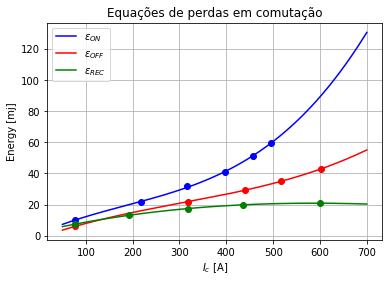

In [8]:
current = np.linspace(50, 700, 700*2)

plt.plot(current, p_energyOn(current)*1e3, 'b-', label='$\epsilon_{ON}$')
plt.plot(currentValues_On, energyOn*1e3, 'bo ')
plt.plot(current, p_energyOff(current)*1e3, 'r-', label='$\epsilon_{OFF}$')
plt.plot(currentValues_Off, energyOff*1e3, 'ro ')
plt.plot(current, p_energyRec(current)*1e3, 'g-', label='$\epsilon_{REC}$')
plt.plot(currentValues_Rec, energyRec*1e3, 'go ')
# plt.plot(current, p_energyD_On(current), 'y-', label='$\epsilon_{D, ON}$')
# plt.plot(currentValues, energyD_On, 'yo ')
plt.legend()
plt.title('Equações de perdas em comutação')
plt.xlabel('$I_c$ [A]')
plt.ylabel('Energy [mj]')
plt.grid()
plt.show()

![](IGBT_polys.jpg)

### 4. Salvando equações num ``pickle`` para uso em outro script

In [11]:
import pickle

to_save = {'name': 'SKM400GB125D', 'type': 'IGBT','eon': p_energyOn, 'eoff': p_energyOff, 'erec': p_energyRec, 'eDon': p_energyD_On}

with open('models/SKM400GB125D.pklmod', 'wb') as filep:
    pickle.dump(to_save, filep)